In [1]:
import pandas as pd
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import time
from IPython.display import clear_output
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

In [11]:
#Preprocess training set
data=pd.read_csv('C:/Users/X99S5/Documents/AMLS_22-23_SN18046828/Datasets/cartoon_set/labels.csv')

labelsTrain = data["\teye_color\tface_shape\tfile_name"].str.split(pat="\t", n=-1, expand=True)
labelsTrain.drop(columns =[0,1], inplace = True)
labelsTrain.columns = [ "face_shape" , "img_name"]
labelsTrain = labelsTrain.astype({'face_shape': 'int32'})
labelsTrain = labelsTrain.astype({'img_name': 'string'})

#Preprocess testing set
data=pd.read_csv('C:/Users/X99S5/Documents/AMLS_22-23_SN18046828/Datasets/cartoon_set_test/labels.csv')

labelsTest = data["\teye_color\tface_shape\tfile_name"].str.split(pat="\t", n=-1, expand=True)
labelsTest.drop(columns =[0,1], inplace = True)
labelsTest.columns = [ "face_shape" , "img_name"]
labelsTest = labelsTest.astype({'face_shape': 'int32'})
labelsTest = labelsTest.astype({'img_name': 'string'})

In [133]:
#left to right
av_lr=[]
for i in range(0,10000):
    image = cv.imread('C:/Users/X99S5/Documents/AMLS_22-23_SN18046828/Datasets/cartoon_set/img/' + labelsTrain["img_name"][i])
    image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    image = cv.resize(image, dsize=(100, 100), interpolation=cv.INTER_CUBIC)
    lr=[]
    for j in range(0,100):
        
        for j2 in range(0,100):
            if image[j,j2] != 255:
                lr.append(j2)
                break
    
    av_lr.append(min(lr))

print('minimum_value:' + str(min(av_lr)))
print('mean_value:' + str(np.mean(av_lr)))
print('standard_deviation_value:' + str(np.std(av_lr)))
print('Z_score_value:' + str( (np.mean(av_lr)-min(av_lr))/np.std(av_lr) ) )

minimum_value:10
mean_value:23.3855
standard_deviation_value:4.914253732765535
Z_score_value:2.7238113308543404


In [139]:
#right to left
av_lr=[]
for i in range(0,10000):
    image = cv.imread('C:/Users/X99S5/Documents/AMLS_22-23_SN18046828/Datasets/cartoon_set/img/' + labelsTrain["img_name"][i])
    image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    image = cv.resize(image, dsize=(100, 100), interpolation=cv.INTER_CUBIC)
    lr=[]
    for j in range(0,100):
        
        for j2 in range(99,0,-1):
            if image[j,j2] != 255:
                lr.append(100-j2)
                break
    
    av_lr.append(min(lr))

print('minimum_value:' + str(min(av_lr)))
print('mean_value:' + str(np.mean(av_lr)))
print('standard_deviation_value:' + str(np.std(av_lr)))
print('Z_score_value:' + str( (np.mean(av_lr)-min(av_lr))/np.std(av_lr) ) )

minimum_value:12
mean_value:23.4961
standard_deviation_value:5.009249922892648
Z_score_value:2.2949743328760577


In [142]:
#up to down
av_lr=[]
for i in range(0,10000):
    image = cv.imread('C:/Users/X99S5/Documents/AMLS_22-23_SN18046828/Datasets/cartoon_set/img/' + labelsTrain["img_name"][i])
    image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    image = cv.resize(image, dsize=(100, 100), interpolation=cv.INTER_CUBIC)
    lr=[]
    for j in range(0,100):
        
        for j2 in range(0,100):
            if image[j2,j] != 255:
                lr.append(j2)
                break
    
    av_lr.append(min(lr))

print('minimum_value:' + str(min(av_lr)))
print('mean_value:' + str(np.mean(av_lr)))
print('standard_deviation_value:' + str(np.std(av_lr)))
print('Z_score_value:' + str( (np.mean(av_lr)-min(av_lr))/np.std(av_lr) ) )

minimum_value:1
mean_value:18.6578
standard_deviation_value:3.9393018620055
Z_score_value:4.482469386342079


In [143]:
#down to up
av_lr=[]
for i in range(0,10000):
    image = cv.imread('C:/Users/X99S5/Documents/AMLS_22-23_SN18046828/Datasets/cartoon_set/img/' + labelsTrain["img_name"][i])
    image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    image = cv.resize(image, dsize=(100, 100), interpolation=cv.INTER_CUBIC)
    lr=[]
    for j in range(0,100):
        
        for j2 in range(99,0,-1):
            if image[j2,j] != 255:
                lr.append(100-j2)
                break
    
    av_lr.append(min(lr))

print('minimum_value:' + str(min(av_lr)))
print('mean_value:' + str(np.mean(av_lr)))
print('standard_deviation_value:' + str(np.std(av_lr)))
print('Z_score_value:' + str( (np.mean(av_lr)-min(av_lr))/np.std(av_lr) ) )

minimum_value:9
mean_value:20.2186
standard_deviation_value:4.127373746100539
Z_score_value:2.718096467662787


In [12]:
#Load training set################################
imagesTrain = np.zeros((10000, 500, 500))

for i in range(0,10000):
    image = cv.imread('C:/Users/X99S5/Documents/AMLS_22-23_SN18046828/Datasets/cartoon_set/img/' + labelsTrain["img_name"][i])
    image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    imagesTrain[i] = image
    
imagesTrain = imagesTrain.reshape(10000,250000)    
imagesTrain = pd.DataFrame(imagesTrain) 


#Load Testing set################################
imagesTest = np.zeros((2500, 500, 500))

for i in range(0,2500):
    image = cv.imread('C:/Users/X99S5/Documents/AMLS_22-23_SN18046828/Datasets/cartoon_set_test/img/' + labelsTest["img_name"][i])
    image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    imagesTest[i] = image
    
imagesTest = imagesTest.reshape(2500,250000)   

imagesTest = pd.DataFrame(imagesTest) 

In [13]:
imagesTrain.head()

,0,1,2,3,4,5,6,7,8,9,...,249990,249991,249992,249993,249994,249995,249996,249997,249998,249999
0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
1,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
2,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
3,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0
4,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0


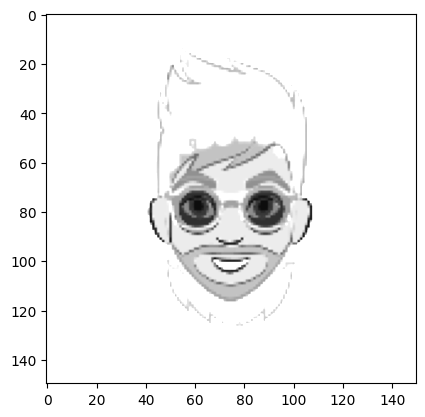

In [69]:
# image = cv.imread('C:/Users/X99S5/Documents/AMLS_22-23_SN18046828/Datasets/cartoon_set/img/' + labelsTrain["img_name"][0])
# image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
# res = cv.resize(image, dsize=(150, 150), interpolation=cv.INTER_CUBIC)

# image2 = cv.imread('C:/Users/X99S5/Documents/AMLS_22-23_SN18046828/Datasets/cartoon_set/img/' + labelsTrain["img_name"][241])
# image2 = cv.cvtColor(image2, cv.COLOR_BGR2GRAY)
# res2 = cv.resize(image2, dsize=(150, 150), interpolation=cv.INTER_CUBIC)

# plt.imshow(res + res2/2 , cmap='gray', vmin=0, vmax=255 )
# count= 0
# for i in range(0,500):
#     for i2 in range(0,500):
#         if image[i,i2] == 255:
#             image[i,i2] = 0
#             count+=1

# print(count)